# Visualización de la información

## Proyecto: Inflación en Latinoamerica




### Introducción

El aumento de los precios de los alimentos, el combustible y otros productos básicos está inquietando a la población de toda América Latina y está perjudicando especialmente a las familias pobres ya afectadas por la pandemia. En este notebook trataremos a traves de datos dar un contexto a como la inflación se ha ido comportando en los últimos 15 años.

#### Importarmos las librerias a utilizar

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [213]:
df = pd.read_csv('Inflation.csv')
df.head()

,Country,Year,Link,Source,Rate
0,Ecuador,2021,https://www.ecuadorencifras.gob.ec//indice-de-...,Banco Ecuador,1.90%
1,El Salvador,2021,http://www.bcr.gob.sv/bcrsite/?x21=73&lang=es,Banco del Salvador,6.10%
2,Panamá,2021,http://www.contraloria.gob.pa/inec/,INEC,2.60%
3,Rep. Dominicana,2021,http://www.bancentral.gov.do/,Banco Central,8.50%
4,Bolivia,2021,https://www.bcb.gob.bo/?q=indicadores_inflacion,Banco Central,0.90%


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  266 non-null    object
 1   Year     266 non-null    int64 
 2   Link     266 non-null    object
 3   Source   266 non-null    object
 4   Rate     266 non-null    object
dtypes: int64(1), object(4)
memory usage: 10.5+ KB


#### Preparamos la data para su visualización

Con la información que tenemos del dataset vemos que tiene 5 columnas y 266 filas. La columna rate que es el porcentaje de inflación tiene como el tipo de dato un objeto, por lo que tendremos que modificarlo para nuestro análisis y poder graficarlo. Para esto tendremos que definir el tipo de dato como tipo float eliminando el %.

In [215]:
df.Rate = df.Rate.str.replace('%', '')
df.Rate = df.Rate.astype('float64')

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  266 non-null    object 
 1   Year     266 non-null    int64  
 2   Link     266 non-null    object 
 3   Source   266 non-null    object 
 4   Rate     266 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 10.5+ KB


In [217]:
df.describe()

,Year,Rate
count,266.000000,266.000000
mean,2014.097744,360.048120
std,4.285763,4928.329091
min,2007.000000,-1.600000
25%,2010.000000,2.725000
50%,2014.000000,4.400000
75%,2018.000000,6.975000
max,2021.000000,80002.000000


In [218]:
df.drop(['Link', 'Source'], axis=1, inplace=True)

In [219]:
print(df.Country)

0             Ecuador 
1          El Salvador
2               Panamá
3      Rep. Dominicana
4              Bolivia
            ...       
261          Colombia 
262           Uruguay 
263            Brasil 
264         Argentina 
265          Venezuela
Name: Country, Length: 266, dtype: object


Podemos ver que hay algunos paises que tienen un espacio al final del nombre, por lo que removeremos ese espacio.

In [220]:
df.Country = df.Country.str.strip()

In [221]:
countries = df.Country.unique()
print(countries)

['Ecuador' 'El Salvador' 'Panamá' 'Rep. Dominicana' 'Bolivia' 'Costa Rica'
 'Perú' 'Guatemala' 'Chile' 'Colombia' 'Paraguay' 'Brasil' 'Nicaragua'
 'Honduras' 'México' 'Uruguay' 'Argentina' 'Venezuela']


Reorganizaremos los datos mediante una tabla dinámica, en lugar de tener el año la tasa en una columna, los años se pivotearán para que sean las columnas con las tasas se presenten como valores

In [222]:
pivot = df.pivot(index='Year', columns='Country', values='Rate')
pivot.head()

Country,Argentina,Bolivia,Brasil,Chile,Colombia,Costa Rica,Ecuador,El Salvador,Guatemala,Honduras,México,Nicaragua,Panamá,Paraguay,Perú,Rep. Dominicana,Uruguay,Venezuela
Year,,,,,,,,,,,,,,,,,,
2007,8.5,11.7,4.5,7.8,5.7,10.8,3.3,4.9,8.7,8.9,6.4,NaN,6.4,5.9,3.9,NaN,8.5,22.5
2008,7.0,11.9,5.9,7.1,7.7,13.9,8.8,5.5,9.4,10.8,6.8,NaN,6.8,7.5,6.7,NaN,9.2,30.9
2009,15.2,0.3,4.3,-1.4,2.0,4.1,4.3,-0.2,-0.3,11.4,1.9,0.9,1.9,1.9,0.2,5.8,5.9,25.1
2010,10.9,7.2,5.9,3.0,3.2,5.8,3.3,2.1,5.4,6.5,3.5,9.2,3.5,7.2,2.1,6.2,6.9,27.2
2011,9.5,6.9,6.5,4.4,3.7,4.7,5.4,5.1,6.2,5.6,3.8,8.0,5.9,4.9,4.7,7.8,8.6,27.6


In [223]:
pivot.columns

Index(['Argentina', 'Bolivia', 'Brasil', 'Chile', 'Colombia', 'Costa Rica',
       'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'México',
       'Nicaragua', 'Panamá', 'Paraguay', 'Perú', 'Rep. Dominicana', 'Uruguay',
       'Venezuela'],
      dtype='object', name='Country')

Separaremos la data en grupos para un mejor análisis.

In [224]:
plt.style.use('ggplot')

group1 = pivot[['Bolivia', 'Costa Rica',
       'Ecuador', 'El Salvador', 'Guatemala']]
group2 = pivot[['Honduras', 'México',
       'Nicaragua', 'Panamá', 'Rep. Dominicana']]
group3 = pivot[['Brasil', 'Chile', 'Uruguay', 'Colombia', 'Perú', 'Paraguay']]

group4 = pivot[['Bolivia', 'Costa Rica', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'México', 'Nicaragua', 'Panamá',
                'Rep. Dominicana', 'Brasil', 'Chile', 'Uruguay', 'Colombia', 'Perú', 'Paraguay', 'Argentina', 'Venezuela']]

group5 = pivot[['Bolivia', 'Costa Rica', 'Ecuador', 'El Salvador', 'Guatemala', 'Honduras', 'México', 'Nicaragua', 'Panamá',
                'Rep. Dominicana', 'Brasil', 'Chile', 'Uruguay', 'Colombia']]




group6 = pivot[['Brasil', 'México']]
group7 = pivot[['Argentina']]

chi = pivot['Chile']


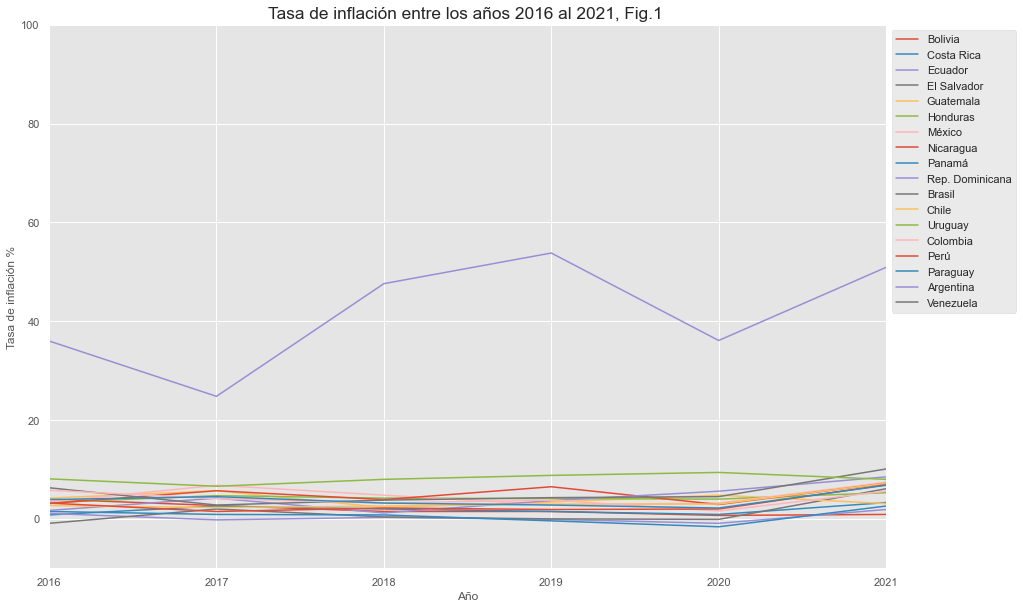

In [226]:
group4.plot(figsize=(15, 10))
plt.xlim([2016, 2021])
plt.ylim([-10,100])
plt.title("Tasa de inflación entre los años 2016 al 2021, Fig.1 ",fontsize='xx-large') 
plt.ylabel('Tasa de inflación %', fontsize='large')
plt.xlabel('Año', fontsize='large')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

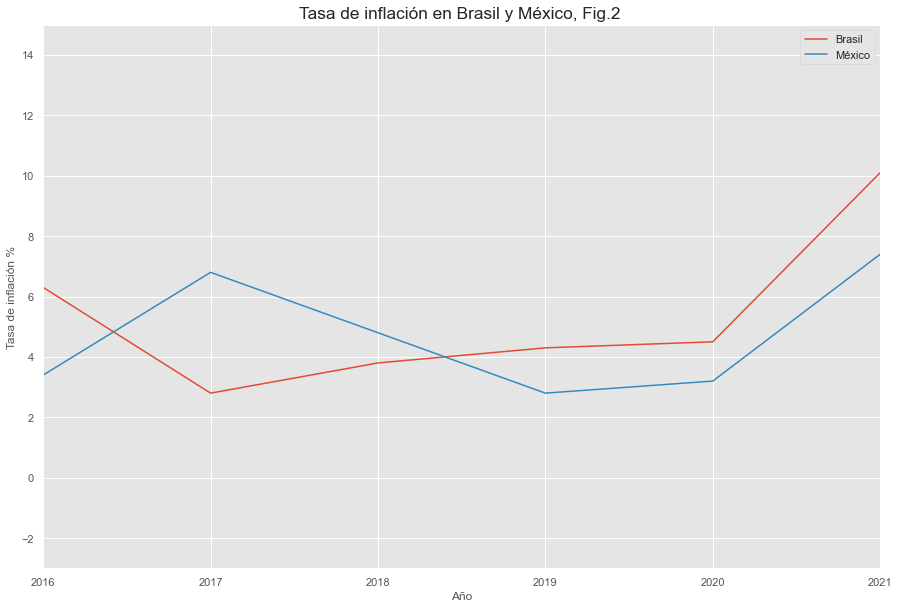

In [227]:
group6.plot(figsize=(15, 10))
plt.xlim([2016, 2021])
plt.title("Tasa de inflación en Brasil y México, Fig.2 ",fontsize='xx-large') 
plt.ylim([-3,15])
plt.ylabel('Tasa de inflación %', fontsize='large')
plt.xlabel('Año', fontsize='large')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

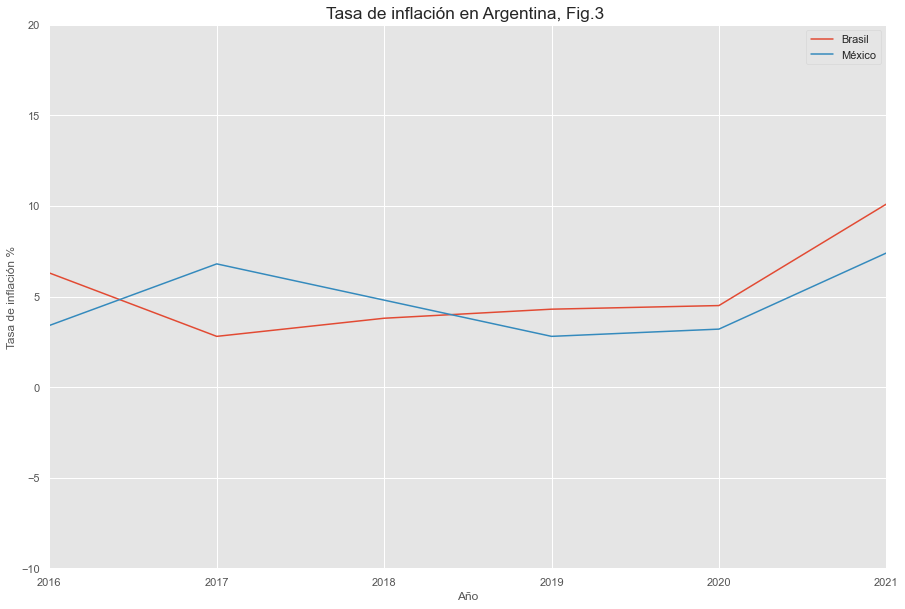

In [229]:
group6.plot(figsize=(15, 10))
plt.xlim([2016, 2021])
plt.ylim([-10,20])
plt.title("Tasa de inflación en Argentina, Fig.3 ",fontsize='xx-large') 
plt.ylabel('Tasa de inflación %', fontsize='large')
plt.xlabel('Año', fontsize='large')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Como podemos ver en la figura 1 (Fig.1) la inflación azotó a Latinoamérica en 2021, lo que ha dejado a sus economías más grandes, Brasil y México (Fig. 2), con sus alzas más altas en años, y ha agudizado los antiguos problemas de precios en países como Argentina (figura 3). América Latina cerrará el año como la región con mayor aumento de precios del mundo, según el Fondo Monetario Internacional (FMI), que en sus últimas proyecciones estimó una inflación regional del 9,3 % en 2021 y de 7,8 % en 2022. Este es el panorama de la subida de precios en Latinoamérica, que padece los vaivenes de la pandemia y los problemas en las cadenas de suministro en combinación con sus añejos problemas.

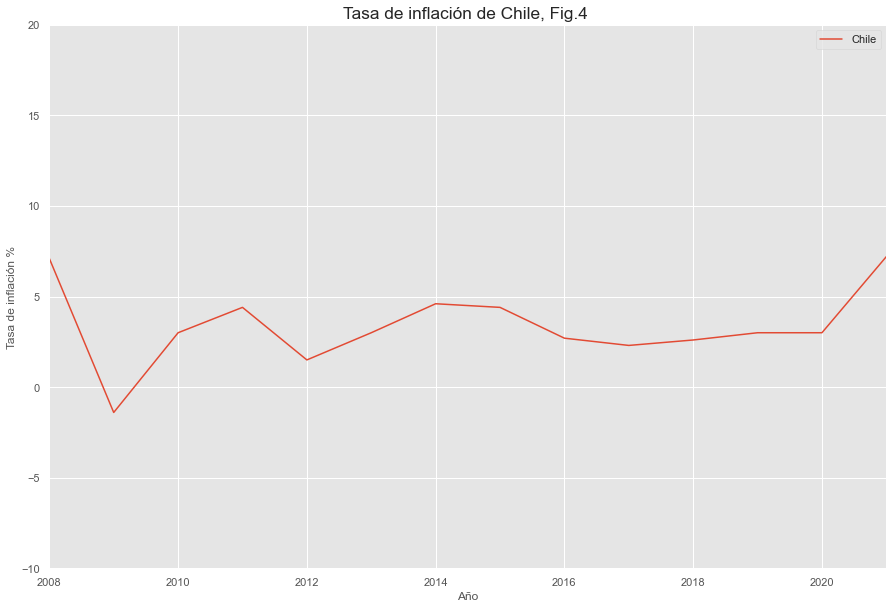

In [211]:
chi.plot(figsize=(15, 10))
plt.xlim([2008, 2021])
plt.ylim([-10,20])
plt.title("Tasa de inflación de Chile, Fig.4 ",fontsize='xx-large') 
plt.ylabel('Tasa de inflación %', fontsize='large')
plt.xlabel('Año', fontsize='large')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Para el caso de Chile, la inflación alcanzó cotas no vistas en más de 13 años, desde la crisis financiera de 2008, y en noviembre se elevó hasta una tasa interanual de 6,7 % (Fig. 4). 
La mayor liquidez, producto de las ayudas sociales y los retiros anticipados del 10 % de las pensiones, medidas para afrontar la crisis de la covid-19, son los principales motivos por lo que este índice posiblemente se haya disparado. Debido al estímulo fiscal inyectado para la crisis, entraron en circulación más de 35.000 millones de dólares en ayudas, a los que se suman los más de 50.000 millones de dólares por los retiros de pensiones.

### Conclusiones

De acuerdo a la información descrita anteriormente podemos concluir que ha habido un aumento en la inflación en toda la región en 2021, y los últimos datos muestran que las tasas alcanzaron máximos en muchos años en Brasil, México, Colombia, Chile y Perú, superando los objetivos de los bancos centrales. La tendencia inflacionaria se ve impulsada en cada país de la región por diversas causas específicas. Con todos estos factores, los economistas coinciden en que la inflación continuará subiendo este año en la región, lo cual provocará aumentos en las tasas de interés y un empobrecimiento del poder adquisitivo de la población.


### Bibliografía


LATIMES. (2021). Los Angeles Times. https://www.latimes.com/espanol/internacional/articulo/2021-12-15/la-inflacion-azota-a-latinoamerica-y-reaviva-los-fantasmas-de-viejas-crisis

Becker Fridman Institute (2022). https://manifold.bfi.uchicago.edu/projects/monetary-fiscal-history-latin-america-1960-2017

Diario Financiero (2022). https://www.df.cl/internacional/economia/inflacion-cerro-disparada-en-latinoamerica-en-2021-arriba-de-meta-de